<a href="https://colab.research.google.com/github/Gheras13/Homework/blob/main/Copia_di_HW1_3R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNING HOMEWORK 1

#DIRECT KINEMATICS OF ROBOT MANIPLUATOR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import tensorflow as tf
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

# Generate Data

In [ ]:


# Percorso del file CSV
file_path = '/content/drive/My Drive/Copia di r3_20_100k.csv'
# Carico il dataset
dataset = pd.read_csv(file_path, sep=';', header=0)

# Rimuovo eventuali spazi dai nomi delle colonne
dataset.columns = dataset.columns.str.strip()
#prendo i primi 1000 samples
df = dataset.iloc[:10000]
# Stampa i nomi delle colonne disponibili
print("Colonne disponibili nel dataset:", df.columns.tolist())

# Estraggo le feature (j0, j1) e i target (ee_x, ee_y)
X = df[['j0', 'j1','j2']].values  # Angoli articolari
Y = df[['ee_x', 'ee_y']].values  # Posizioni finali (end-effector)

# Verifico i dati caricati
print("Esempio di X (features):", X[:5])  # Prime 5 righe delle feature
print("Esempio di Y (target):", Y[:5])  # Prime 5 righe del target


In [ ]:
# Divido i dati in training e testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


'\n# (Opzionale) Standardizza gli input per migliorare la stabilità numerica\nscaler_X = StandardScaler()\nscaler_Y = StandardScaler()\n\nX_train = scaler_X.fit_transform(X_train)\nX_test = scaler_X.transform(X_test)\n\nY_train = scaler_Y.fit_transform(Y_train)\nY_test = scaler_Y.transform(Y_test)\n'

# Test del modello

In [ ]:
# Modello SVR per ee_x
grid_search_x = GridSearchCV(
    estimator=SVR(),
    param_grid={
        'C': [0.1, 1],  # Solo 2 valori per C
        'kernel': ['linear', 'rbf'],  # Limita a kernel lineare e RBF
        'epsilon': [0.01, 0.1]  # Margine di tolleranza più ristretto
    },
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Modello SVR per ee_y
grid_search_y = GridSearchCV(
    estimator=SVR(),
    param_grid={
        'C': [0.1, 1],  # Solo 2 valori per C
        'kernel': ['linear', 'rbf'],  # Limita a kernel lineare e RBF
        'epsilon': [0.01, 0.1]  # Margine di tolleranza più ristretto
    },
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Eseguo Grid Search per ee_x
grid_search_x.fit(X_train, Y_train[:, 0])
best_model_x = grid_search_x.best_estimator_
best_params_x = grid_search_x.best_params_
best_score_x = -grid_search_x.best_score_

print(f"Migliori parametri per ee_x: {best_params_x}")
print(f"Miglior MSE (cross-validation) per ee_x: {best_score_x}")

# Eseguo Grid Search per ee_y
grid_search_y.fit(X_train, Y_train[:, 1])
best_model_y = grid_search_y.best_estimator_
best_params_y = grid_search_y.best_params_
best_score_y = -grid_search_y.best_score_

print(f"Migliori parametri per ee_y: {best_params_y}")
print(f"Miglior MSE (cross-validation) per ee_y: {best_score_y}")

# Predizioni finali
Y_pred_x = best_model_x.predict(X_test)
Y_pred_y = best_model_y.predict(X_test)

# Combino le predizioni
Y_pred = np.column_stack((Y_pred_x, Y_pred_y))

# Confronto tra coordinate reali e predette
print("\nConfronto tra coordinate reali e predette (prime 10 righe):")
print("{:<10} {:<10} {:<10} {:<10}".format("ee_x (reale)", "ee_x (pred.)", "ee_y (reale)", "ee_y (pred.)"))
for i in range(10):  # Mostra le prime 10 righe
    print("{:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        Y_test[i, 0], Y_pred[i, 0], Y_test[i, 1], Y_pred[i, 1]
    ))

# Calcolo delle metriche sul test set
mse_x = mean_squared_error(Y_test[:, 0], Y_pred_x)
mse_y = mean_squared_error(Y_test[:, 1], Y_pred_y)
mse_total = mean_squared_error(Y_test, Y_pred)

r2_x = r2_score(Y_test[:, 0], Y_pred_x)
r2_y = r2_score(Y_test[:, 1], Y_pred_y)
r2_total = r2_score(Y_test, Y_pred)

print(f"MSE sul test set (ee_x): {mse_x}")
print(f"MSE sul test set (ee_y): {mse_y}")
print(f"MSE totale sul test set: {mse_total}")
print(f"R2 sul test set (ee_x): {r2_x}")
print(f"R2 sul test set (ee_y): {r2_y}")
print(f"R2 totale sul test set: {r2_total}")




Fitting 3 folds for each of 8 candidates, totalling 24 fits
Migliori parametri per ee_x: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Miglior MSE (cross-validation) per ee_x: 4.022025752152202e-05
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Migliori parametri per ee_y: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Miglior MSE (cross-validation) per ee_y: 4.1427518289553854e-05

Confronto tra coordinate reali e predette (prime 10 righe):
ee_x (reale) ee_x (pred.) ee_y (reale) ee_y (pred.)
0.0990     0.0928     -0.2030    -0.1989   
-0.1830    -0.1726    0.1960     0.1967    
0.0560     0.0471     0.1940     0.1944    
-0.2190    -0.2217    -0.0400    -0.0357   
0.1460     0.1529     -0.1180    -0.1128   
0.0610     0.0689     -0.0970    -0.0996   
-0.1980    -0.1927    -0.0830    -0.0915   
-0.0780    -0.0765    -0.2490    -0.2384   
-0.2760    -0.2737    0.0830     0.0747    
0.1610     0.1686     -0.1230    -0.1179   
MSE sul test set (ee_x): 3.776438821745674e-05
MSE sul t

#Convergenza della perdita durante l'addestramento

 Configurazione del modello per l'addestramento:

 - Funzione di perdita: Mean Squared Error (MSE).
 - Metriche: Mean Absolute Error (MAE).


# Valutazione finale del modello sul set di test.
# Metriche:
# - `loss`: Errore quadratico medio (MSE), risulterà essere la nostra LOSS FUNCTION.
# - `mae`: Errore assoluto medio.



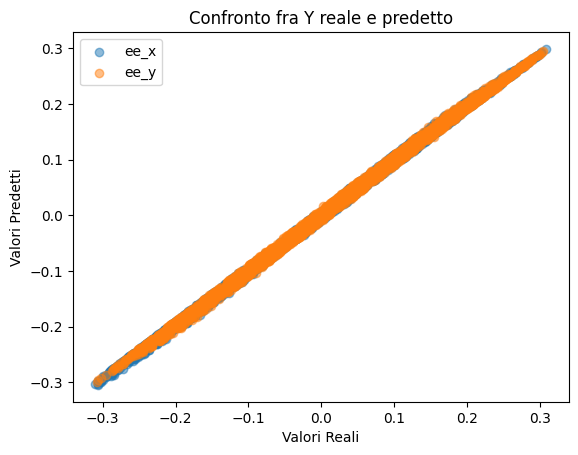

In [ ]:
# Visualizzazione dei risultati
plt.scatter(Y_test[:, 0], Y_pred[:, 0], label='ee_x', alpha=0.5)
plt.scatter(Y_test[:, 1], Y_pred[:, 1], label='ee_y', alpha=0.5)
plt.legend()
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto fra Y reale e predetto')
plt.show()


#GRAFICO DI OVERFITTING

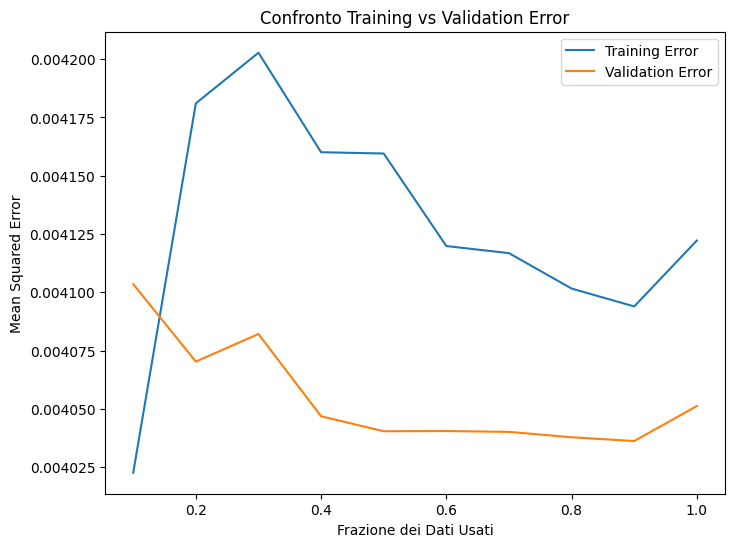

In [ ]:
# Lista per registrare gli errori
training_errors = []
validation_errors = []

# Simulo l'addestramento con più frazioni di dati
fractions = np.linspace(0.1, 1.0, 10)  # Usa frazioni crescenti dei dati
for frac in fractions:
    # Prendo una porzione crescente del training set
    subset_size = int(frac * len(X_train))
    X_train_subset = X_train[:subset_size]
    Y_train_subset = Y_train[:subset_size]

    # Addestro il modello su questo sottoinsieme
    model = SVR(kernel='rbf', C=1, epsilon=0.1)
    model.fit(X_train_subset, Y_train_subset[:, 0])  # Solo ee_x per semplicità

    # Calcolo gli errori
    train_pred = model.predict(X_train_subset)
    val_pred = model.predict(X_test)

    training_errors.append(mean_squared_error(Y_train_subset[:, 0], train_pred))
    validation_errors.append(mean_squared_error(Y_test[:, 0], val_pred))

# Grafico degli errori
plt.figure(figsize=(8, 6))
plt.plot(fractions, training_errors, label='Training Error')
plt.plot(fractions, validation_errors, label='Validation Error')
plt.title('Confronto Training vs Validation Error')
plt.xlabel('Frazione dei Dati Usati')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Confronto delle predizioni(scatter plot)

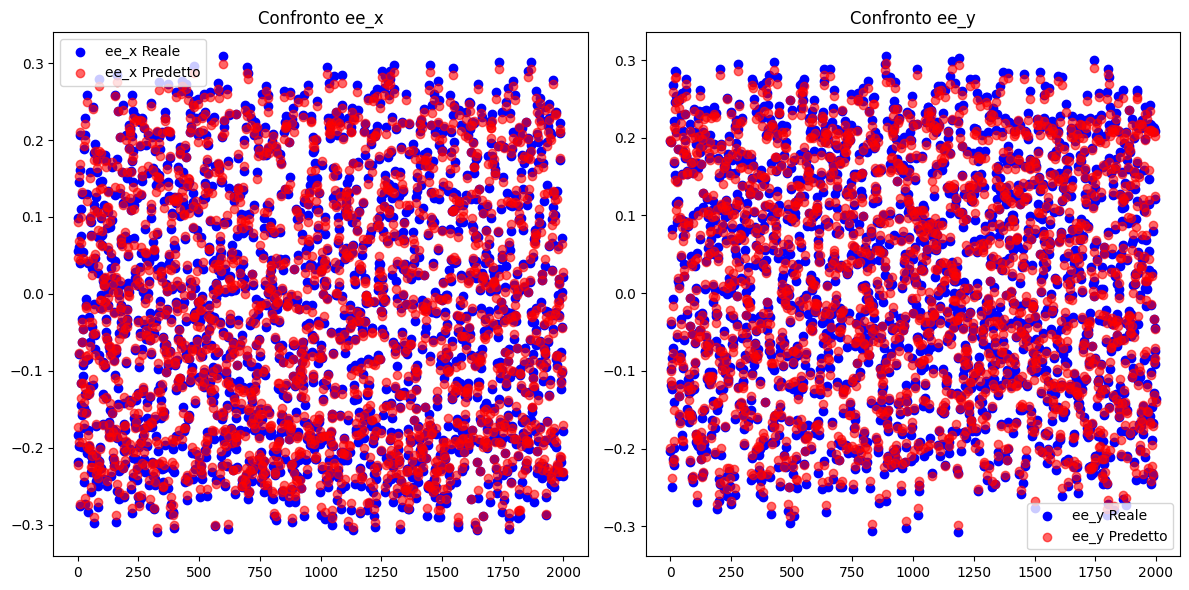

In [ ]:
plt.figure(figsize=(12, 6))

# ee_x
plt.subplot(1, 2, 1)
plt.scatter(range(len(Y_test[:, 0])), Y_test[:, 0], color='blue', label='ee_x Reale')
plt.scatter(range(len(Y_pred[:, 0])), Y_pred[:, 0], color='red', alpha=0.6, label='ee_x Predetto')
plt.title("Confronto ee_x")
plt.legend()

# ee_y
plt.subplot(1, 2, 2)
plt.scatter(range(len(Y_test[:, 1])), Y_test[:, 1], color='blue', label='ee_y Reale')
plt.scatter(range(len(Y_pred[:, 1])), Y_pred[:, 1], color='red', alpha=0.6, label='ee_y Predetto')
plt.title("Confronto ee_y")
plt.legend()

plt.tight_layout()
plt.show()


# Distribuzione degli errori

#Performance del modello per campione

#Definizione dei jacobiani

In [ ]:
# Forward Kinematics Function
def FK(model, theta):
    """
    Calcola l'output del modello per un input dato.

    Args:
        model: Modello TensorFlow.
        theta: Input, un tensore con shape (batch_size, 2).

    Returns:
        Output reshaped in un vettore 1D (2,).
    """
    t = tf.reshape(theta, shape=(1, 3))  # Adatta agli input con 3 features
    out = model(t)  # Predizione
    out = tf.reshape(out, shape=(2,))  # Reshape per output 1D
    return out

@tf.function
def FK_Jacobian(model, x):
    """
    Calcola la Jacobiana numerica usando TensorFlow GradientTape.

    Args:
        model: Modello TensorFlow.
        x: Input, un tensore con shape (1, 3).

    Returns:
        Jacobiana calcolata come tensore (2x3).
    """
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = FK(model, x)
    return tape.jacobian(y, x)

# Calcolo della Jacobiana analitica per un robot 3R
def analytical_J_3R(theta, L1=0.1, L2=0.1, L3=0.1):
    theta1, theta2, theta3 = theta
    J = np.array([
        [
            -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3),
            -L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3),
            -L3 * np.sin(theta1 + theta2 + theta3)
        ],
        [
            L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3),
            L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3),
            L3 * np.cos(theta1 + theta2 + theta3)
        ]
    ])
    return J

#Calcolo e confronto delle Jacobiane
theta_sample = X_test[0]  # Primo esempio del test set

# Jacobiana numerica appresa (ee_x e ee_y)
jacobian_learned_x = numerical_jacobian(best_model_x, theta_sample)
jacobian_learned_y = numerical_jacobian(best_model_y, theta_sample)

# Combino per ottenere la Jacobiana complessiva
jacobian_learned = np.vstack((jacobian_learned_x, jacobian_learned_y))

# Jacobiana analitica
jacobian_analytical = analytical_J_3R(theta_sample)

# Calcolo l'errore tra Jacobiane
jacobian_error = np.mean((jacobian_learned - jacobian_analytical) ** 2)

print("Jacobiana appresa (numerica):\n", jacobian_learned)
print("\nJacobiana analitica:\n", jacobian_analytical)
print(f"\nErrore quadratico medio (MSE) tra Jacobiane: {jacobian_error}")


Jacobiana appresa (numerica):
 [[0.19674148 0.1334616  0.05702615]
 [0.09414268 0.00868223 0.0665575 ]]

Jacobiana analitica:
 [[0.19620002 0.13866764 0.06449822]
 [0.09113851 0.00934594 0.07641976]]

Errore quadratico medio (MSE) tra Jacobiane: 3.165960903138325e-05


# JACOBIANA ANALITICA VS APPRESA

Nella heatmap:

Ogni cella rappresenta un elemento della Jacobiana.
Il colore della cella indica l'entità del valore:
*  Blu intenso: Valori negativi grandi.
*  Blu chiaro o neutro: Valori vicini a 0.
*  Arancione intenso: Valori positivi grandi.

La scala di colori aiuta a interpretare visivamente:

*  Quanto è grande la derivata parziale:
Valori positivi più grandi sono più vicini all'arancione intenso.
Valori negativi grandi sono più vicini al blu intenso.
*  La variazione della sensibilità:
Se una cella è blu scuro o arancione intenso, l'output cambia molto in relazione all'input.
Se una cella è vicina al bianco, l'output cambia poco rispetto all'input.

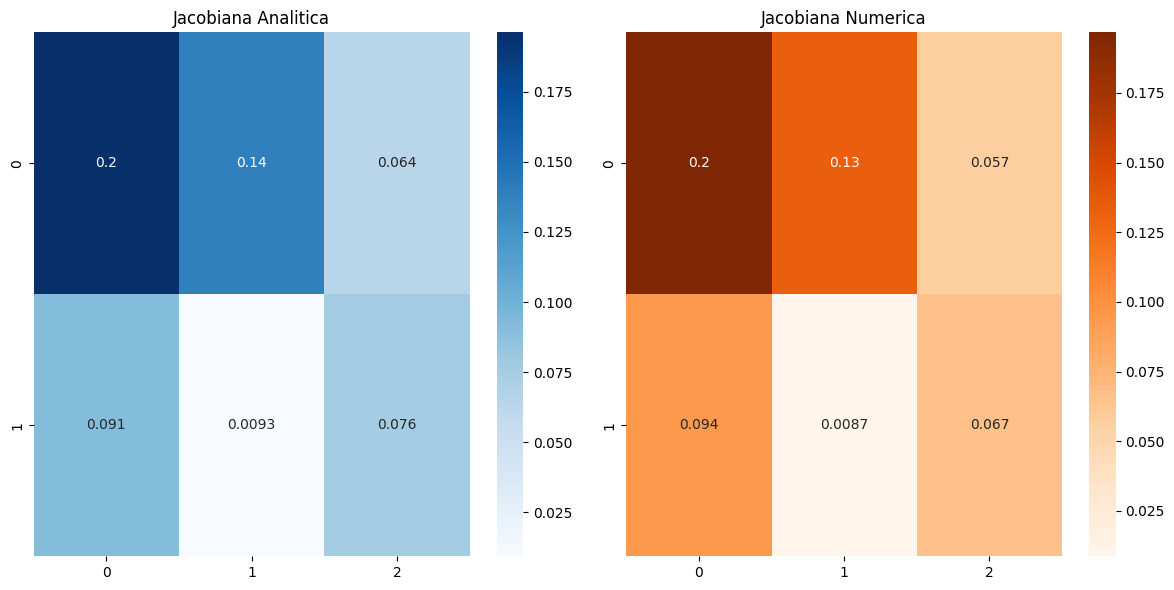

In [ ]:
# Confronto visivo tra Jacobiane
plt.figure(figsize=(12, 6))

# Jacobiana Analitica
plt.subplot(1, 2, 1)
sns.heatmap(jacobian_analytical, annot=True, cmap="Blues", cbar=True)
plt.title("Jacobiana Analitica")

# Jacobiana Numerica
plt.subplot(1, 2, 2)
sns.heatmap(jacobian_learned, annot=True, cmap="Oranges", cbar=True)
plt.title("Jacobiana Numerica")

plt.tight_layout()
plt.show()
